<big>**基本介绍**</big>

逻辑回归模型是线性模型，但属于广义线性模型。

Logistic 回归的本质是：逻辑回归假设数据服从**伯努利分布**，通过极大化似然函数的方法，运用梯度下降来求解参数，来达到将数据二分类的目的。



**伯努利分布**，又称为0-1分布，伯努利随机变量X服从参数p的伯努利分布表示为：
$$f(X|p)=
\begin{cases}
p^{x}(1-p)^{1-x}& \text{x=0,1}\\
0& \text{x!=0,1}
\end{cases}$$


**极大似然估计**，利用已知的样本结果信息，反推最有可能（最大概率）导致这些样本结果出现的模型参数值（模型已定，参数未知）。

**极大似然估计中采样需满足一个重要的假设，就是所有的采样都是独立同分布的。**

极大似然估计的步骤：

1、已知模型，写出似然函数，并将数据代入到模型中，得到参数方程

2、对参数方程中各参数求偏导，并令结果为0，得到对应的参数值。


<big>**keypoints**</big>

1、服从伯努利分布，从而推导出参数表达式为sigmoid函数；

2、最大似然函数，取对数是为了优化连乘的计算操作；

3、求使似然函数最大的参数（使负似然函数最小的参数） 与 求使损失函数最小的参数 是等价的。因此对数似然函数就作为了损失函数。

4、损失函数为$-\sum_{i=0}^N y_iln(h_{\theta}(x_i))+(1-y_i)ln(1-ln(h_{\theta}(x_i))$

5、LR模型中特征的共线性不会影响模型的最优解，但是会使得系数不稳定，从而解释性变差。



------------------------------------------------------------
**Q1:逻辑回归中，分布函数为什么采用sigmoid？**

逻辑回归的前提假设是数据服从伯努利分布，即 $f(x)=p^x(1-p)^{1-x}$，又可以转化得到：

$f(X=x,p)=e^{lnp^x(1-p)^{1-x}}\\=  e^{xlnp+(1-x)ln(1-p)} \\ =e^{xln\frac{lnp}{ln(1-p)}+ lnp} $

由于逻辑回归也是一种线性模型，依据广义线性模型中指数簇分布的形式，可以得到

$$f(x)=
\begin{cases}
b(X)=1\\
T(X)=x\\
\eta=ln{\frac{p}{1-p}}\\
\alpha({\eta})=-ln{(1-p)}
\end{cases}$$


因此，$$p=\frac{e^\eta}{1+e^\eta}=\frac{1}{1+e^{-\eta}}$$

可知，参数p服从sigmoid函数分布。

也就是说，一个观测量(x, y)，可以表示成

$$f(x) = \frac{1}{1+e^{-wx}}$$


------
**Q2:损失函数怎么来的？**

又由于y的取值为0,1，令$P(Y=1|x)=h_{\theta}(x)$所以又可以将$f(x)$表示为：
$$P(y|x, \theta)=(h_{\theta}(x))^y(1-h_{\theta}(x))^{1-y}$$

为了估计参数$\theta$，采用极大似然估计法，

$$L_{\theta}=\displaystyle \prod_{i=0}^N P(y|x_i, \theta)$$

连乘处理起来比较麻烦，因此，取log

$$ln(L_{\theta}) = \displaystyle \sum_{i=0}^N ln(P(y|x_i, \theta))\\
=\sum_{i=0}^N y_iln(h_{\theta}(x_i))+(1-y_i)ln(1-ln(h_{\theta}(x_i))$$

再将$h_{\theta}(x)=\frac{1}{1+e^{-\theta x}}$代入，可得
$$ln(L_{\theta})=\sum_{i=0}^N (y_i \theta x_i)-ln(1+e^{\theta x_i})$$

后续任务就是求使得对数似然函数最大的参数$\theta$，转化一下，即求使$-ln(L)$最小的参数$\theta$。

而这，**求使$-ln(L)$最小的参数$\theta$与使损失函数最小的参数是一样的**。

因此，会把对数似然函数，即***交叉熵函数***作为损失函数。


即在逻辑回归模型中，我们最大化似然函数和最小化损失函数实际上是等价的。

----
**Q2补充：能不能用均方差作为损失函数？**

若使用均方差，则$$L=\sum_{i=0}^{N}\frac{1}{2} (h_{\theta}(x_i)-y_i)^2$$

求导的话，会得到
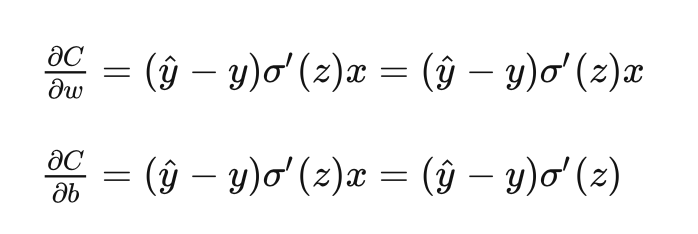

可以看到参数的更新速率与当前的预测值sigmoid函数的导数有关。当模型的输出接近0或者1时，梯度会很小，更新会很缓慢。

而使用交叉熵函数作为代价损失函数时，梯度与sigmoid无关，且与预测值和实际值的差值，高度相关，即差的越多，更新速率越大；相差越少，更新越缓慢。

**Q3:已知损失/似然函数，如何求解参数**

1、使用梯度下降不断逼急最优解
$$g_{\theta} = \frac{\partial J(\theta)}{\partial \theta}\\
\theta_{new}=\theta-\eta g_{\theta}
$$


2、使用牛顿法牛顿法，利用目标函数的二次Taylor展开，并将其极小化。

函数f(x)在x_0处的二阶泰勒展开为：
$$f(x)=f(x_0) + (x-x_0)f'{(x-x_0)} + \frac{1}{2}(x-x_0)^2f{''}{(x-x_0)}$$

对左右两边求导，并令导数为0
$$f'(x)=f'{(x-x_0))}+{(x-x_0)}f''{(x-x_0)}=0，即\\
x=x_0-\frac{f'{(x-x_0))}}{f''{(x-x_0)}}
$$

因此，使用牛顿法求参数，就需要先求得一阶导数和二阶导数。对于多元函数，$f(x,y,z,...)$，二阶导数即$\nabla f(x_0)$，又被称为Hessian矩阵。

多元函数的牛顿法求解公式为：

$$x_{k+1}=x_{k}H_k^{-1}g_k$$
其中，$H_k^{-1}$即为$x=k$处的Hessian的逆阵，$g_k$为$x=k$处的一阶导矩阵。

---------


In [2]:
# 使用梯度下降实现逻辑回归LR

# coiding:utf-8
import numpy as np 
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets

%matplotlib inline

In [19]:
# 准备数据集

def load_dataset():
    dataset = datasets.load_breast_cancer()  
    train_x,train_y = dataset['data'][0:400], dataset['target'][0:400]
    test_x, test_y = dataset['data'][400:-1], dataset['target'][400:-1]
    return train_x, train_y, test_x, test_y

# logit激活函数
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))    
    return s

# 权重初始化0
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

# 定义学习的目标函数，计算梯度
def propagate(w, b, X, Y):
    '''
    param w, b:权重
    param X, Y:特征 & 标签
    '''
    m = X.shape[1]      
    A = sigmoid(np.dot(w.T, X) + b)         # 逻辑回归输出预测值  
    cost = -1 / m *  np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))   # 交叉熵损失为目标函数
    dw = 1 / m * np.dot(X, (A - Y).T)   # 计算权重w梯度
    db = 1 / m * np.sum(A - Y)   
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())    
    grads = {"dw": dw,
             "db": db}    
    return grads, cost

# 定义优化算法
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost):
    costs = []    
    for i in range(num_iterations):    # 梯度下降迭代优化
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]              # 权重w梯度
        db = grads["db"]
        w = w - learning_rate * dw   # 按学习率(learning_rate)负梯度(dw)方向更新w
        b = b - learning_rate * db
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

#传入优化后的模型参数w，b，模型预测   
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        if A[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    # 初始化
    w, b = initialize_with_zeros(X_train.shape[0]) 
    # 梯度下降优化模型参数
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    # 模型预测结果
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # 模型评估准确率
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}    
    return d

# 加载癌细胞数据集
train_set_x, train_set_y, test_set_x, test_set_y = load_dataset()   

# reshape
train_set_x = train_set_x.reshape(train_set_x.shape[0], -1).T
test_set_x = test_set_x.reshape(test_set_x.shape[0], -1).T

print(train_set_x.shape)
print(test_set_x.shape)

#训练模型并评估准确率
paras = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 500, learning_rate = 0.0005, print_cost = False)



(30, 400)
(30, 168)
train accuracy: 90.75 %
test accuracy: 94.04761904761905 %


/Users/wangjie/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/Users/wangjie/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply
/Users/wangjie/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [69]:
import numpy as np
 
class NewtonLR(object):
    def __init__(self, error: float = 0.7, max_epoch: int = 100):
        """
        :param error: float, if the distance between new weight and 
          old weight is less than error, the process 
          of traing will break.
        :param max_epoch: if training epoch >= max_epoch the process 
           of traing will break.
        """
        self.error = error
        self.max_epoch = max_epoch
        self.weight = None
        self.sign = np.vectorize(lambda x: 1 if x >= 0.5 else 0)
        
    def p_func(self, X_):
        """Get P(y=1 | x)
        :param X_: shape = (n_samples + 1, n_features)
        :return: shape = (n_samples)
        """
        tmp = np.exp(self.weight @ X_.T)
        return tmp / (1 + tmp)
 
    def diff(self, X_, y, p):
        """Get derivative
        :param X_: shape = (n_samples, n_features + 1) 
        :param y: shape = (n_samples)
        :param p: shape = (n_samples) P(y=1 | x)
        :return: shape = (n_features + 1) first derivative
        """
        return -(y - p) @ X_
    
    def hess_mat(self, X_, p):
        """Get Hessian Matrix
        :param p: shape = (n_samples) P(y=1 | x)
        :return: shape = (n_features + 1, n_features + 1) second derivative
        """
        hess = np.zeros((X_.shape[1], X_.shape[1]))
        for i in range(X_.shape[0]):
            hess += self.X_XT[i] * p[i] * (1 - p[i])
        return hess
    
    def newton_method(self, X_, y):
        """Newton Method to calculate weight
        :param X_: shape = (n_samples + 1, n_features)
        :param y: shape = (n_samples)
        :return: None
        """
        self.weight = np.ones(X_.shape[1])
        self.X_XT = []
        for i in range(X_.shape[0]):
            t = X_[i, :].reshape((-1, 1))
            self.X_XT.append(t @ t.T)

        for epoch in range(self.max_epoch):
            p = self.p_func(X_)
            diff = self.diff(X_, y, p)
            hess = self.hess_mat(X_, p)
            new_weight = self.weight - (np.linalg.inv(hess) @ diff.reshape((-1, 1))).flatten()
            
            if np.linalg.norm(new_weight - self.weight) <= self.error:
                print(epoch)
                break
        self.weight = new_weight
        
        
    def fit(self, X, y):
        """
        :param X_: shape = (n_samples, n_features)
        :param y: shape = (n_samples)
        :return: self
        """
        X_ = np.c_[np.ones(X.shape[0]), X]
        self.newton_method(X_, y)
        return self
 
    def predict(self, X) -> np.array:
        """
        :param X: shape = (n_samples, n_features] 
        :return: shape = (n_samples]
        """
        X_ = np.c_[np.ones(X.shape[0]), X]
        return self.sign(self.p_func(X_))

In [70]:
model = NewtonLR(error=0.7, max_epoch=100)
model = model.fit(train_set_x.T, train_set_y)

/Users/wangjie/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/Users/wangjie/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [71]:
preds = model.predict(test_set_x.T)

In [72]:
print("test accuracy: {} %".format(100 - np.mean(np.abs(preds - test_set_y)) * 100))    

test accuracy: 23.214285714285708 %


In [73]:
train_set_x.shape, test_set_x.shape

((30, 400), (30, 168))